In [ ]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install nltk
%pip install Sastrawi
%pip install wordcloud
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Visualisasi Hasil All Data

### Mengimport Dataset Penuh

In [ ]:
import pandas as pd

df = pd.read_csv('sample_data/the_data_all_selected.csv')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,1d551a40-3222-48e3-a1e4-fddcf796e718,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tidak bisa login ..,1,0,NaN,2025-02-06 11:48:26,NaN,NaN,NaN
1,797b2437-5f7f-4414-8007-ed63ed59e3bb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kenapa tidak bisa masuk ke jobstreet?,4,0,14.40.1,2025-02-06 10:57:42,NaN,NaN,14.40.1
2,05ac0472-0482-44ca-9e4c-0e15cc952e49,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tidak ADA INFO cepat mengenai pemberitahuan le...,1,0,14.39.0,2025-02-06 09:02:23,NaN,NaN,14.39.0
3,22316109-69b9-472b-aecf-6a68862f0a28,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,gabisa login teruss,3,0,14.40.1,2025-02-06 08:34:17,NaN,NaN,14.40.1
4,fa41392c-57fd-4ed0-807d-394621b7ab14,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Setelah update kenapa g bisa masuk????,3,0,NaN,2025-02-05 17:17:58,NaN,NaN,NaN


### Menghitung Jumlah Baris

In [ ]:
len(df.index)

74206

### Mengurutkan Data Berdasarkan Date

In [ ]:
new_df = df[['userName', 'score', 'at', 'content']]
my_df = new_df.sort_values(by=['at'], ascending=False)

my_df.head()

,userName,score,at,content
0,Pengguna Google,1,2025-02-06 11:48:26,Tidak bisa login ..
1,Pengguna Google,4,2025-02-06 10:57:42,Kenapa tidak bisa masuk ke jobstreet?
2,Pengguna Google,1,2025-02-06 09:02:23,Tidak ADA INFO cepat mengenai pemberitahuan le...
3,Pengguna Google,3,2025-02-06 08:34:17,gabisa login teruss
4,Pengguna Google,3,2025-02-05 17:17:58,Setelah update kenapa g bisa masuk????


### Menampilkan Informasi Dataset

In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74206 entries, 0 to 74205
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  74206 non-null  object
 1   score     74206 non-null  int64 
 2   at        74206 non-null  object
 3   content   74197 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [ ]:
my_df.describe()

,score
count,74206.000000
mean,4.348341
std,1.216372
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### Menghapus Baris my_df yang NULL

In [ ]:
my_df = my_df.dropna()
my_df.isnull().sum()

userName    0
score       0
at          0
content     0
dtype: int64

### Menghitung Jumlah Baris setelah NULL Dihilangkan

In [ ]:
len(my_df)

74197

In [ ]:
df = my_df

In [ ]:
len(df.index)

74197

## Preprocessing Data

### a. Casefolding

In [ ]:
import re
def clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    my_df[new_text_field_name] = my_df[new_text_field_name].str.replace(r"\d+", "")
    return my_df

In [ ]:
my_df['text_clean'] = my_df['content'].str.lower()
my_df['text_clean']

0                                      tidak bisa login ..
1                    kenapa tidak bisa masuk ke jobstreet?
2        tidak ada info cepat mengenai pemberitahuan le...
3                                      gabisa login teruss
4                   setelah update kenapa g bisa masuk????
                               ...                        
74201                             good luck for us all....
74202                                                  top
74203                                                   ok
74204                                 thanks for the job..
74205    nice app, runing on my gio. but somehow thing ...
Name: text_clean, Length: 74197, dtype: object

In [ ]:
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head()

,userName,score,at,content,text_clean
0,Pengguna Google,1,2025-02-06 11:48:26,Tidak bisa login ..,tidak bisa login
1,Pengguna Google,4,2025-02-06 10:57:42,Kenapa tidak bisa masuk ke jobstreet?,kenapa tidak bisa masuk ke jobstreet
2,Pengguna Google,1,2025-02-06 09:02:23,Tidak ADA INFO cepat mengenai pemberitahuan le...,tidak ada info cepat mengenai pemberitahuan le...
3,Pengguna Google,3,2025-02-06 08:34:17,gabisa login teruss,gabisa login teruss
4,Pengguna Google,3,2025-02-05 17:17:58,Setelah update kenapa g bisa masuk????,setelah update kenapa g bisa masuk


### b. Filtering

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('indonesian')
data_clean['text_Stopword'] = data_clean['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\randi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,userName,score,at,content,text_clean,text_Stopword
0,Pengguna Google,1,2025-02-06 11:48:26,Tidak bisa login ..,tidak bisa login,login
1,Pengguna Google,4,2025-02-06 10:57:42,Kenapa tidak bisa masuk ke jobstreet?,kenapa tidak bisa masuk ke jobstreet,masuk jobstreet
2,Pengguna Google,1,2025-02-06 09:02:23,Tidak ADA INFO cepat mengenai pemberitahuan le...,tidak ada info cepat mengenai pemberitahuan le...,info cepat pemberitahuan mingisi form lamaran ...
3,Pengguna Google,3,2025-02-06 08:34:17,gabisa login teruss,gabisa login teruss,gabisa login teruss
4,Pengguna Google,3,2025-02-05 17:17:58,Setelah update kenapa g bisa masuk????,setelah update kenapa g bisa masuk,update g masuk


### c. Tokenizing

In [ ]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize, sent_tokenize
data_clean['text_tokens'] = data_clean['text_Stopword'].apply(lambda x: word_tokenize(x))
data_clean.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\randi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,userName,score,at,content,text_clean,text_Stopword,text_tokens
0,Pengguna Google,1,2025-02-06 11:48:26,Tidak bisa login ..,tidak bisa login,login,[login]
1,Pengguna Google,4,2025-02-06 10:57:42,Kenapa tidak bisa masuk ke jobstreet?,kenapa tidak bisa masuk ke jobstreet,masuk jobstreet,"[masuk, jobstreet]"
2,Pengguna Google,1,2025-02-06 09:02:23,Tidak ADA INFO cepat mengenai pemberitahuan le...,tidak ada info cepat mengenai pemberitahuan le...,info cepat pemberitahuan mingisi form lamaran ...,"[info, cepat, pemberitahuan, mingisi, form, la..."
3,Pengguna Google,3,2025-02-06 08:34:17,gabisa login teruss,gabisa login teruss,gabisa login teruss,"[gabisa, login, teruss]"
4,Pengguna Google,3,2025-02-05 17:17:58,Setelah update kenapa g bisa masuk????,setelah update kenapa g bisa masuk,update g masuk,"[update, g, masuk]"


### d. Stemming

In [ ]:
%pip install Sastrawi


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung = 0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung += 1
    print(hitung, ":", term, ":", term_dict[term])

print(term_dict)
print("------------------------")

# Apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data_clean['text_tokens_stemmed'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head()


22148
------------------------
1 : login : login
2 : masuk : masuk
3 : jobstreet : jobstreet
4 : info : info
5 : cepat : cepat
6 : pemberitahuan : pemberitahuan
7 : mingisi : mingisi
8 : form : form
9 : lamaran : lamar
10 : kerja : kerja
11 : pikir : pikir
12 : aplikasi : aplikasi
13 : yg : yg
14 : lambat : lambat
15 : efisien : efisien
16 : mencari : cari
17 : pekerjaan : kerja
18 : abu : abu
19 : gabisa : gabisa
20 : teruss : teruss
21 : update : update
22 : g : g
23 : susah : susah
24 : akun : akun
25 : log : log
26 : out : out
27 : banget : banget
28 : tolong : tolong
29 : perbaiki : baik
30 : diakses : akses
31 : busuk : busuk
32 : join : join
33 : 2011 : 2011
34 : sampe : sampe
35 : 2025 : 2025
36 : offering : offering
37 : latter : latter
38 : kebanyakan : banyak
39 : ghosting : ghosting
40 : hr : hr
41 : nya : nya
42 : ampun : ampun
43 : deh : deh
44 : 14 : 14
45 : buang : buang
46 : gagal : gagal
47 : jelek : jelek
48 : aja : aja
49 : pencarian : cari
50 : sesuai : sesuai
51 :

KeyboardInterrupt: 

In [ ]:
data_clean.to_csv('sample_data/the_data_all_hasiltextpreprocessing.csv', index=False)

## Data Extracting

In [ ]:
import pandas as pd

data_clean = pd.read_csv('sample_data/the_data_hasillabeling.csv')
data_clean = pd.DataFrame(data_clean)

data_real = pd.read_csv('sample_data/the_data_all_hasiltextpreprocessing.csv')
data_real = pd.DataFrame(data_real)

A = data_clean['text_tokens_stemmed']
B = data_clean['Label']
C = data_real['text_tokens_stemmed']

### Menghitung Jumlah Baris data_real

In [ ]:
len(data_real)

73981

### Drop Kolom data_clean yang Tidak Digunakan

In [ ]:
data_clean = data_clean.drop(columns=['score', 'text_clean', 'text_Stopword', 'text_tokens'])

### Setup TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Handle missing values by filling them with an empty string

A = A.fillna('')
C = C.fillna('')

tfid_vectorizer = TfidfVectorizer()

A_fit_tfid = tfid_vectorizer.fit_transform(A)
A_tfid = tfid_vectorizer.transform(A)
C_tfid = tfid_vectorizer.transform(C)

In [ ]:
print(A.shape)
print(A_tfid.shape)
print(C.shape)
print(C_tfid.shape)

(2753,)
(2753, 3937)
(73981,)
(73981, 3937)


In [ ]:
A_tfid.toarray()
C_tfid.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## a. Naive Bayes (NB)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(A_tfid, B)

MultinomialNB()

In [ ]:
C_pred = nb.predict(C_tfid)
data_real['Label NB'] = C_pred
data_real = pd.DataFrame(data_real)
data_real.to_csv('sample_data/the_data_all_hasil_sentimen_NB.csv', index=False)

data_real.head()

,userName,score,at,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed,Label NB
0,Pengguna Google,1,2024-12-12 08:14:23,"Setiap apply lamaran disini, bbrpa hari atau b...",setiap apply lamaran disini bbrpa hari atau bb...,apply lamaran bbrpa bbrpa minggu balasan stiap...,"['apply', 'lamaran', 'bbrpa', 'bbrpa', 'minggu...",apply lamar bbrpa bbrpa minggu balas stiap per...,negatif
1,Pengguna Google,3,2024-12-12 07:29:09,"min tolong ini ngebug, masa pas mau buka lowon...",min tolong ini ngebug masa pas mau buka lowong...,min tolong ngebug pas buka lowongan muter mute...,"['min', 'tolong', 'ngebug', 'pas', 'buka', 'lo...",min tolong ngebug pas buka lowong muter muter ...,negatif
2,Pengguna Google,2,2024-12-12 04:27:59,Worth it,worth it,worth it,"['worth', 'it']",worth it,negatif
3,Pengguna Google,1,2024-12-11 23:41:41,"Jadi susah re login by seek, gagal terus",jadi susah re login by seek gagal terus,susah re login by seek gagal,"['susah', 're', 'login', 'by', 'seek', 'gagal']",susah re login by seek gagal,negatif
4,Pengguna Google,1,2024-12-11 22:51:25,TOLONG DI PERBAIKI MASALAH YANG ADA DI APLIKAS...,tolong di perbaiki masalah yang ada di aplikas...,tolong perbaiki aplikasi login eror gausah sur...,"['tolong', 'perbaiki', 'aplikasi', 'login', 'e...",tolong baik aplikasi login eror gausah suruh s...,negatif


In [ ]:
dr = pd.read_csv('sample_data/the_data_all_hasil_sentimen_NB.csv')
dr.head()

,userName,score,at,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed,Label NB
0,Pengguna Google,1,2024-12-12 08:14:23,"Setiap apply lamaran disini, bbrpa hari atau b...",setiap apply lamaran disini bbrpa hari atau bb...,apply lamaran bbrpa bbrpa minggu balasan stiap...,"['apply', 'lamaran', 'bbrpa', 'bbrpa', 'minggu...",apply lamar bbrpa bbrpa minggu balas stiap per...,negatif
1,Pengguna Google,3,2024-12-12 07:29:09,"min tolong ini ngebug, masa pas mau buka lowon...",min tolong ini ngebug masa pas mau buka lowong...,min tolong ngebug pas buka lowongan muter mute...,"['min', 'tolong', 'ngebug', 'pas', 'buka', 'lo...",min tolong ngebug pas buka lowong muter muter ...,negatif
2,Pengguna Google,2,2024-12-12 04:27:59,Worth it,worth it,worth it,"['worth', 'it']",worth it,negatif
3,Pengguna Google,1,2024-12-11 23:41:41,"Jadi susah re login by seek, gagal terus",jadi susah re login by seek gagal terus,susah re login by seek gagal,"['susah', 're', 'login', 'by', 'seek', 'gagal']",susah re login by seek gagal,negatif
4,Pengguna Google,1,2024-12-11 22:51:25,TOLONG DI PERBAIKI MASALAH YANG ADA DI APLIKAS...,tolong di perbaiki masalah yang ada di aplikas...,tolong perbaiki aplikasi login eror gausah sur...,"['tolong', 'perbaiki', 'aplikasi', 'login', 'e...",tolong baik aplikasi login eror gausah suruh s...,negatif


## b. Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
    svm = LinearSVC(C=c)
    svm.fit(A_tfid, B)
    print ("Accuracy for C=%s: %s" % (c, accuracy_score(B, svm.predict(A_tfid))))

svm = LinearSVC(C = 1)
svm.fit(A_tfid, B)

C_pred = svm.predict(C_tfid)
data_real['Label SVM'] = C_pred
data_real.to_csv('sample_data/the_data_all_hasil_sentimen_SVM.csv', index=False)
data_real.head()

Accuracy for C=0.01: 0.887032328369052
Accuracy for C=0.05: 0.9171812568107519
Accuracy for C=0.25: 0.9505993461678169
Accuracy for C=0.5: 0.966581910642935
Accuracy for C=0.75: 0.974573192880494
Accuracy for C=1: 0.9785688339992735


,userName,score,at,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed,Label NB,Label SVM
0,Pengguna Google,1,2024-12-12 08:14:23,"Setiap apply lamaran disini, bbrpa hari atau b...",setiap apply lamaran disini bbrpa hari atau bb...,apply lamaran bbrpa bbrpa minggu balasan stiap...,"['apply', 'lamaran', 'bbrpa', 'bbrpa', 'minggu...",apply lamar bbrpa bbrpa minggu balas stiap per...,negatif,negatif
1,Pengguna Google,3,2024-12-12 07:29:09,"min tolong ini ngebug, masa pas mau buka lowon...",min tolong ini ngebug masa pas mau buka lowong...,min tolong ngebug pas buka lowongan muter mute...,"['min', 'tolong', 'ngebug', 'pas', 'buka', 'lo...",min tolong ngebug pas buka lowong muter muter ...,negatif,negatif
2,Pengguna Google,2,2024-12-12 04:27:59,Worth it,worth it,worth it,"['worth', 'it']",worth it,negatif,negatif
3,Pengguna Google,1,2024-12-11 23:41:41,"Jadi susah re login by seek, gagal terus",jadi susah re login by seek gagal terus,susah re login by seek gagal,"['susah', 're', 'login', 'by', 'seek', 'gagal']",susah re login by seek gagal,negatif,negatif
4,Pengguna Google,1,2024-12-11 22:51:25,TOLONG DI PERBAIKI MASALAH YANG ADA DI APLIKAS...,tolong di perbaiki masalah yang ada di aplikas...,tolong perbaiki aplikasi login eror gausah sur...,"['tolong', 'perbaiki', 'aplikasi', 'login', 'e...",tolong baik aplikasi login eror gausah suruh s...,negatif,negatif


### Memasukkan Data Prediksi NB dan SVM ke CSV

In [ ]:
data_real.to_csv('sample_data/the_data_all_hasil_sentimen_NB_dan_SVM.csv', index=False)

### Mengitung Label Prediksi

In [ ]:
# hitung label positif
positif = dr[dr['Label NB'] == "positif"]
print('Label Positif :', len(positif))

# hitung label negatif
negatif = dr[dr['Label NB'] == "negatif"]
print('Label Negatif :', len(negatif))

# totalkan
total = len(dr)
print('Total :', total)

Label Positif : 61946
Label Negatif : 12035
Total : 73981


### Barplot Label Prediksi

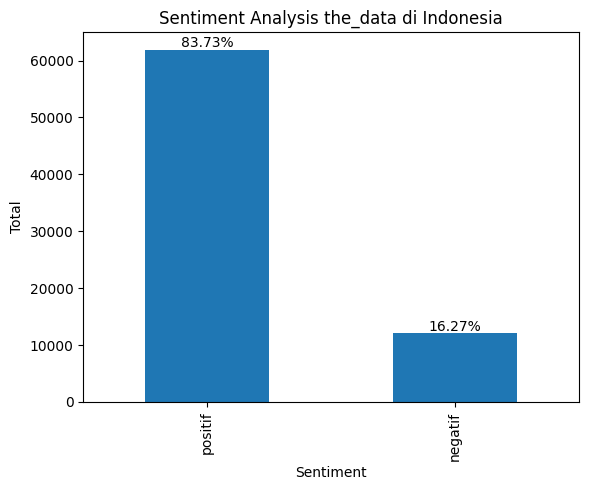

In [ ]:
import matplotlib.pyplot as plt

# Convert 'at' column to datetime and sort by date
dr['date'] = pd.to_datetime(dr['at'])
dr = dr.sort_values(by='date')

# Format the date to 'YYYY-MM-DD' and convert back to datetime
dr['date'] = dr['date'].dt.strftime('%Y-%m-%d')
dr['date'] = pd.to_datetime(dr['date'])

# Calculate value counts and percentages
value_counts = dr['Label NB'].value_counts()
percentages = value_counts / value_counts.sum() * 100

# Plot bar chart with percentages
ax = value_counts.plot(kind='bar')
for i, (count, percentage) in enumerate(zip(value_counts, percentages)):
    ax.text(i, count, f'{percentage:.2f}%', ha='center', va='bottom')

plt.title('Sentiment Analysis the_data di Indonesia')
plt.xlabel('Sentiment')
plt.ylabel('Total')
plt.show()

### Linechart dengan Tanggal

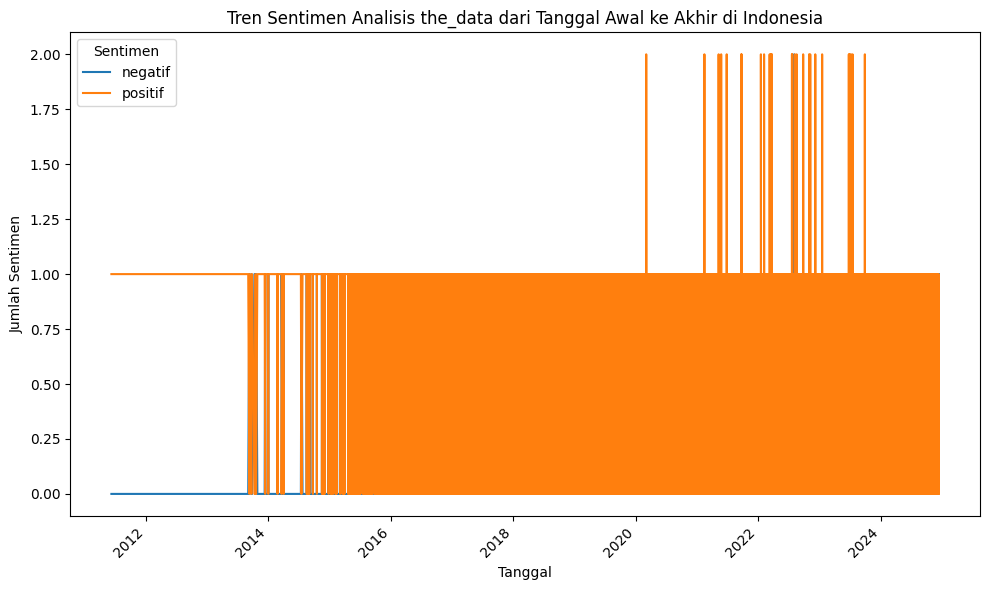

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Konversi kolom 'at' ke datetime dan sort berdasarkan tanggal
dr['date'] = pd.to_datetime(dr['at'])
dr = dr.sort_values(by='date')

# Agregasi jumlah sentimen per tanggal
sentiment_per_day = dr.groupby(['date', 'Label NB']).size().unstack(fill_value=0)

# Plot Line Chart
sentiment_per_day.plot(kind='line', figsize=(10, 6))

# Tambahkan judul dan label sumbu
plt.title('Tren Sentimen Analisis the_data dari Tanggal Awal ke Akhir di Indonesia')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sentimen')
plt.xticks(rotation=45)
plt.legend(title='Sentimen', loc='upper left')
plt.tight_layout()

# Tampilkan plot
plt.show()


### Linechart dengan Bulan

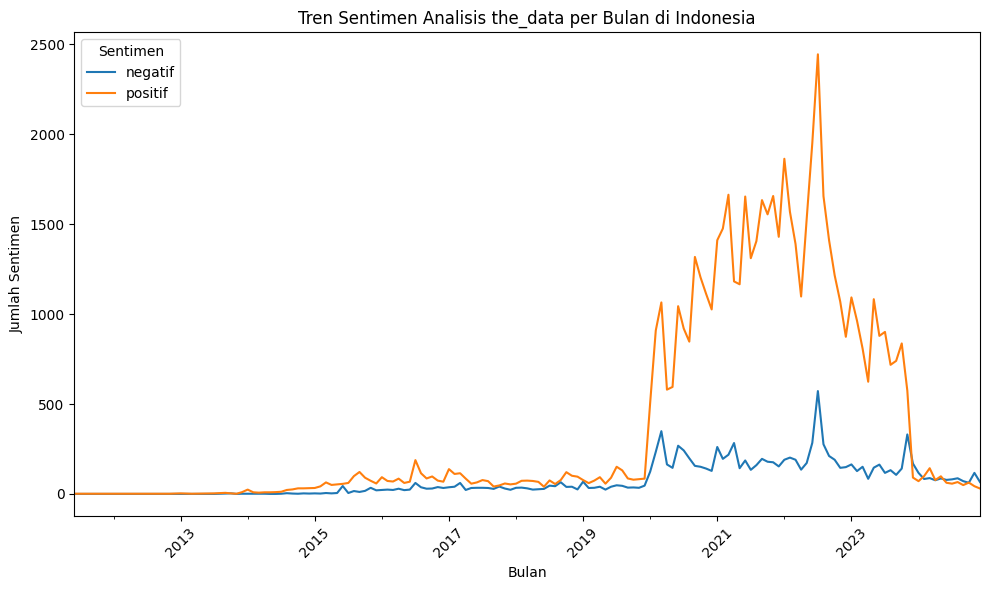

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Konversi kolom 'at' ke datetime dan sort berdasarkan tanggal
dr['date'] = pd.to_datetime(dr['at'])
dr = dr.sort_values(by='date')

# Tambahkan kolom bulan (format YYYY-MM)
dr['month'] = dr['date'].dt.to_period('M')

# Agregasi jumlah sentimen per bulan
sentiment_per_month = dr.groupby(['month', 'Label NB']).size().unstack(fill_value=0)

# Plot Line Chart
sentiment_per_month.plot(kind='line', figsize=(10, 6))

# Tambahkan judul dan label sumbu
plt.title('Tren Sentimen Analisis the_data per Bulan di Indonesia')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Sentimen')
plt.xticks(rotation=45)
plt.legend(title='Sentimen', loc='upper left')
plt.tight_layout()

# Tampilkan plot
plt.show()
